<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, cv2, glob, zipfile
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
WIDTH, HEIGHT = 256, 256

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '36',
    'date' : '09-06-2021',
    'description' : 'Find overlapped trajectories'
    }

ROOT_DIR = os.path.join('/content')

BITMAP_DIR = os.path.join(ROOT_DIR, 'Bitmap')
IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'BITMAP_DIR:      {BITMAP_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
BITMAP_DIR:      /content/Bitmap
IMAGE_DIR:       /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/1_University/PiLab/Experiment/Results/Trajectory_Clusetring_36_09-06-2021_Results


# Load Data

In [ ]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

In [ ]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [ ]:
trajectory_images = [ ]
for file in file_names:
    trajectory_images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

In [ ]:
def plot_random_trajectories(trajectories, image_name, random_size = 10):
    trajectories_number = int(image_name[0:2])
    print(f'Ploting {trajectories_number}th trajectories...')

    random_idx = np.random.randint(0, len(trajectories), size = random_size)

    sum_images = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
    for idx in random_idx:
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if (trajectories[idx][row][col] > 0):
                    sum_images[row][col] = 255
    
    plt.gray()

    txt = ''
    fig, ax = plt.subplots(1, 10, sharex = True, sharey = True, figsize = (100, 10))
    for i in range(10):
        txt += str(i) + ' '
        ax[i].imshow(trajectory_images[random_idx[i]])
        ax[i].set_title(str(random_idx[i]), fontSize = 20)
    plt.savefig(f'{trajectories_number}th all trajectories.png', dpi = 300)
    plt.show()
    
    
    with open(f'{trajectories_number}th random indexes.txt', 'wt') as txtFile:
        txtFile.write(txt)

    plt.imshow(sum_images)
    plt.savefig(image_name, dpi = 300)
    plt.show()

    print(f'Complete {trajectories_number}...')

Ploting 1th trajectories...


<Figure size 432x288 with 0 Axes>

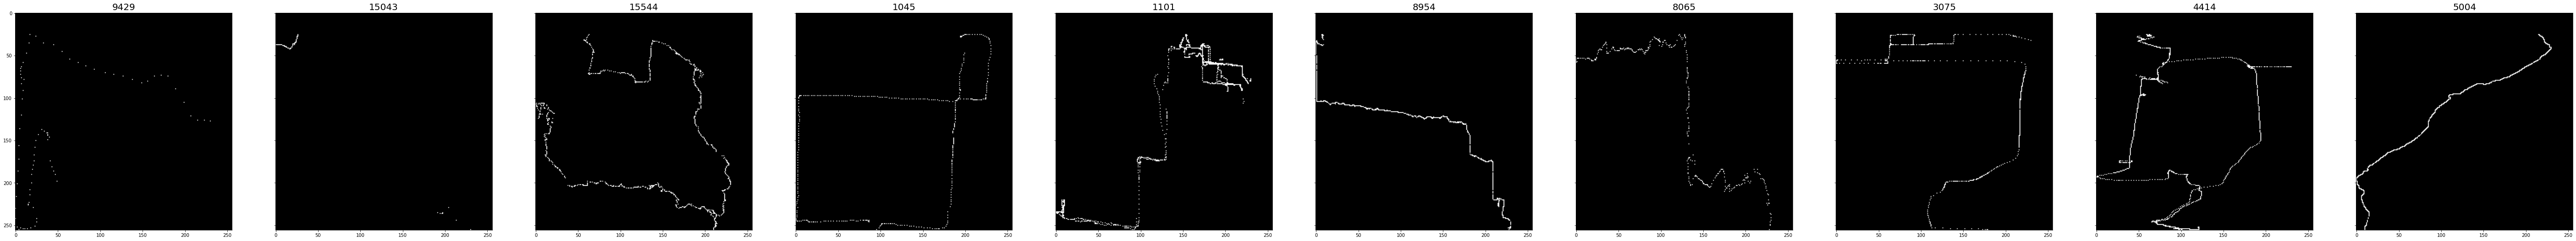

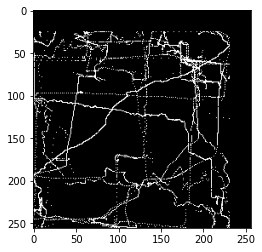

Complete 1...
Ploting 2th trajectories...


<Figure size 432x288 with 0 Axes>

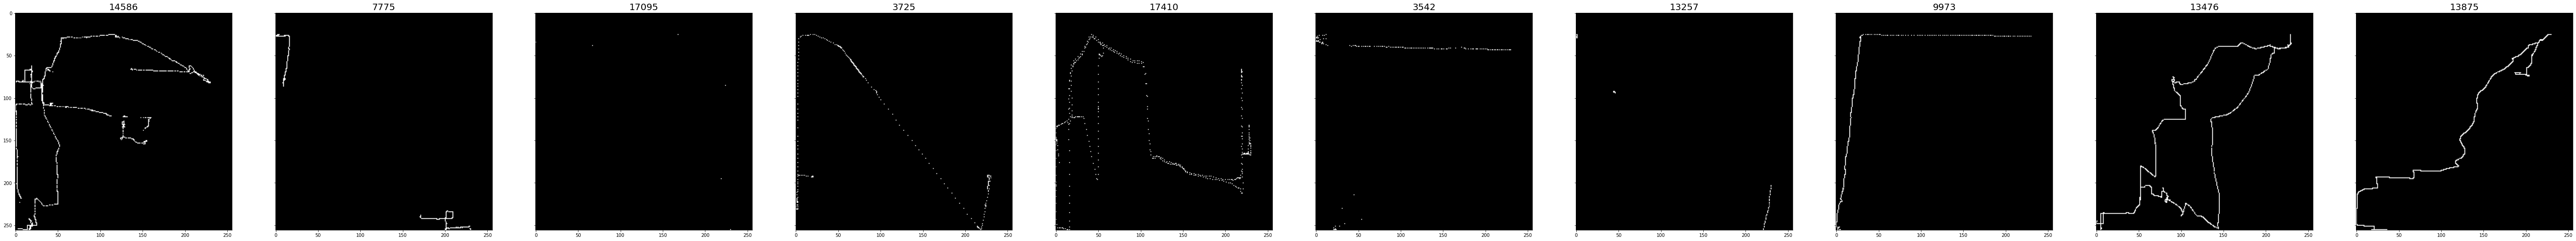

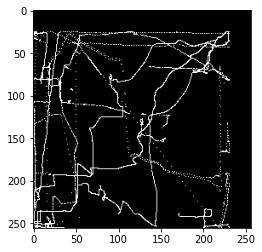

Complete 2...
Ploting 3th trajectories...


<Figure size 432x288 with 0 Axes>

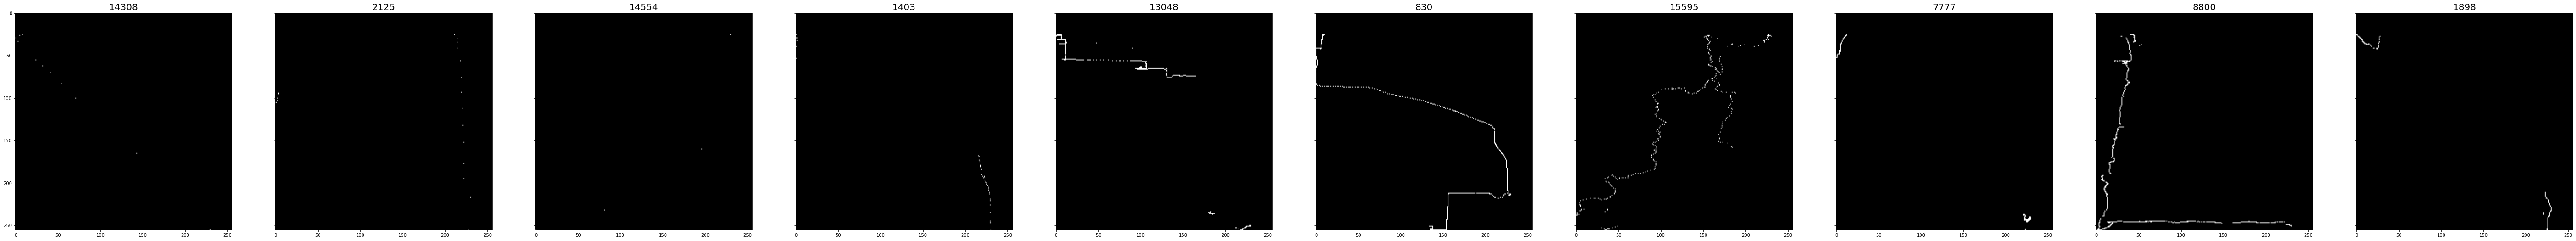

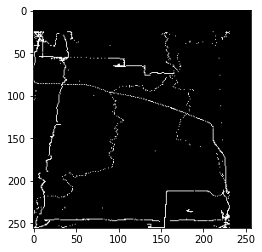

Complete 3...
Ploting 4th trajectories...


<Figure size 432x288 with 0 Axes>

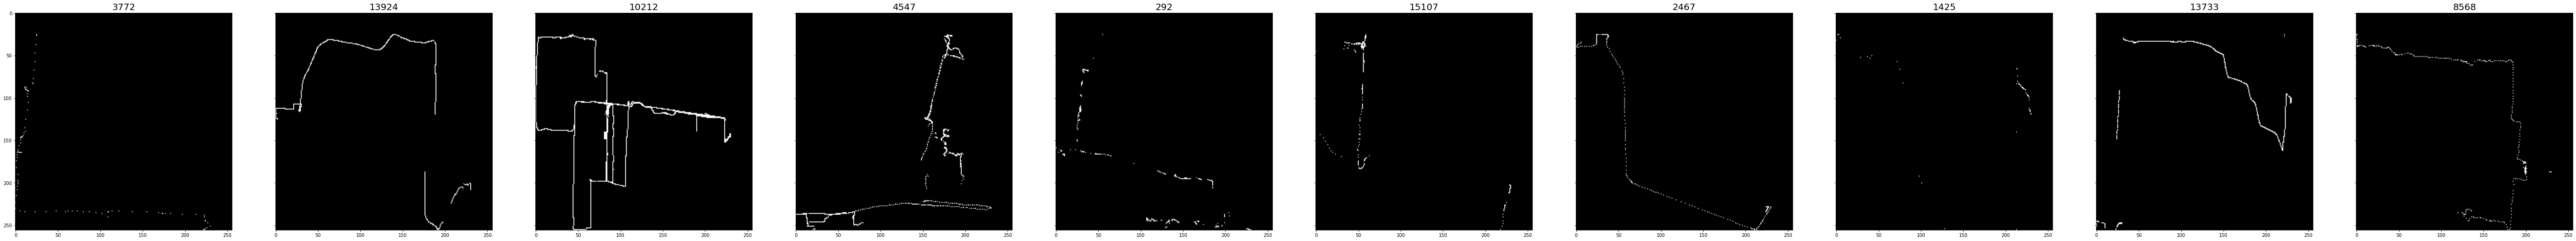

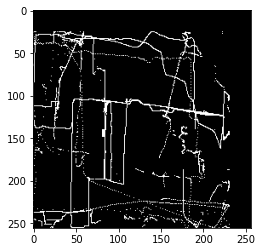

Complete 4...
Ploting 5th trajectories...


<Figure size 432x288 with 0 Axes>

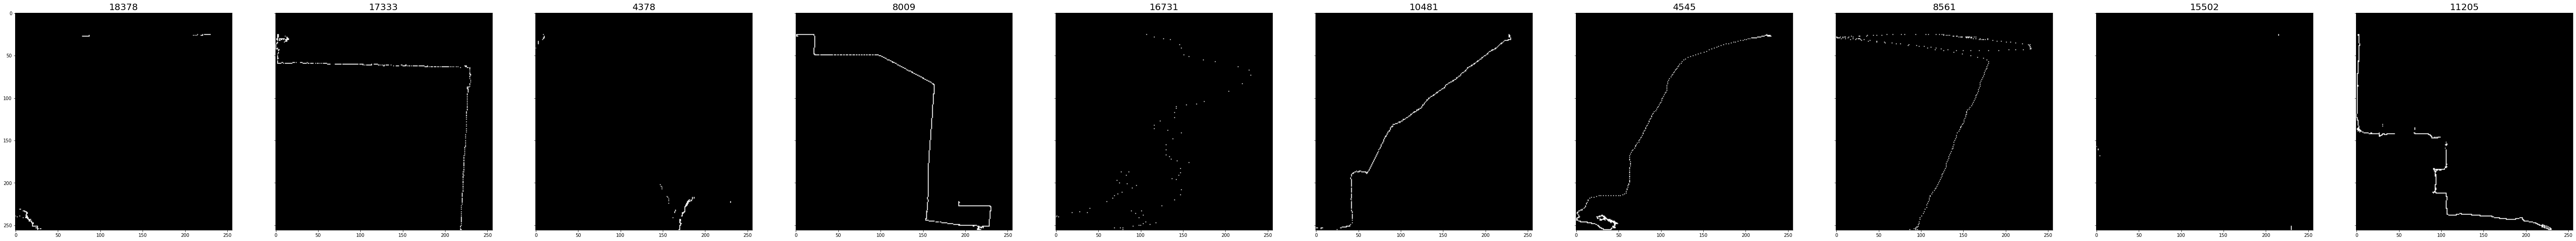

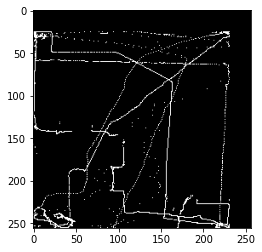

Complete 5...
Ploting 6th trajectories...


<Figure size 432x288 with 0 Axes>

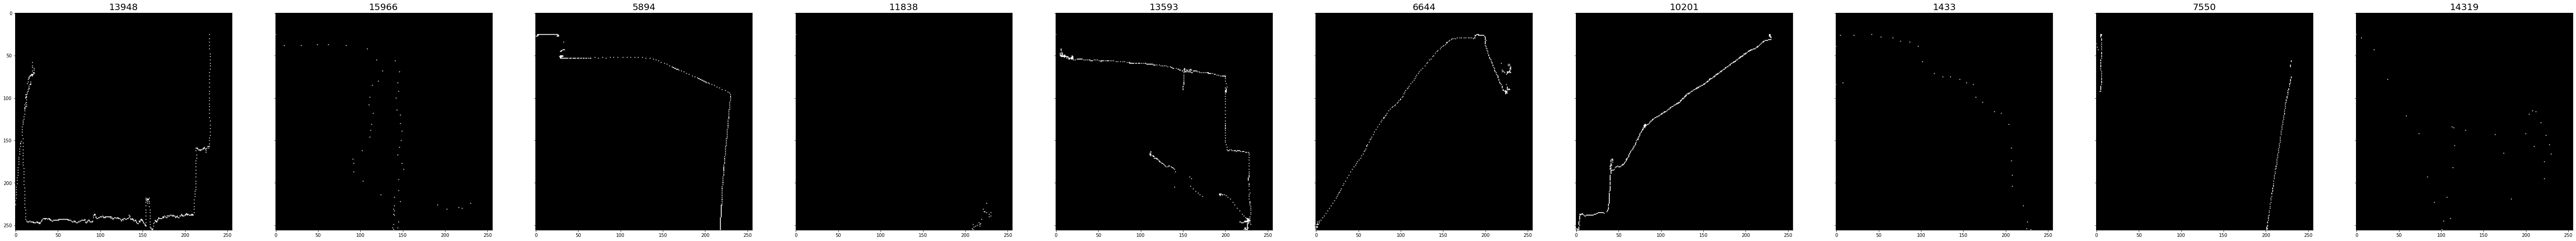

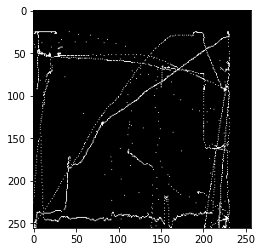

Complete 6...
Ploting 7th trajectories...


<Figure size 432x288 with 0 Axes>

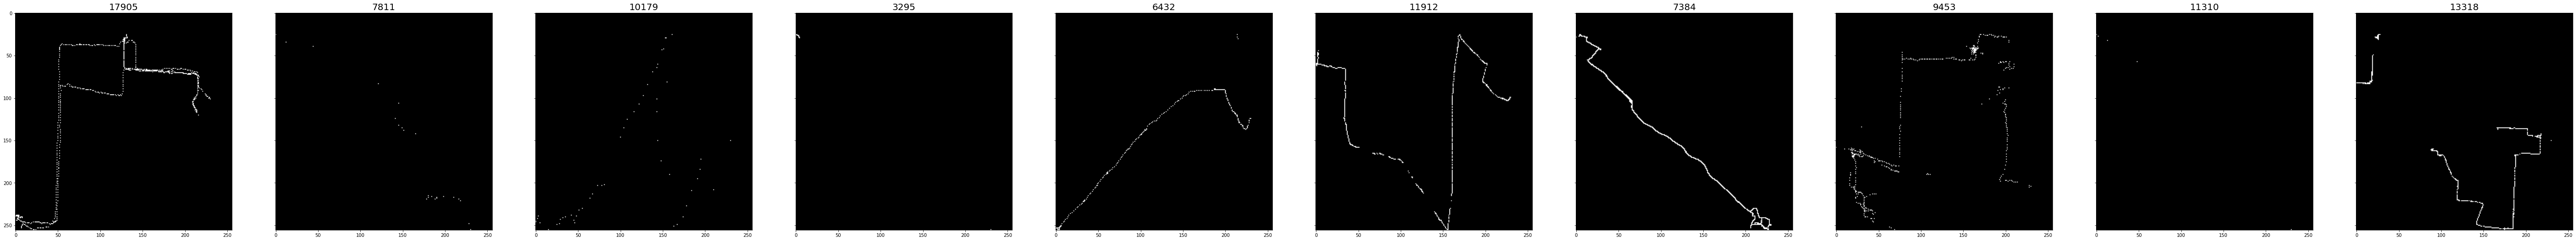

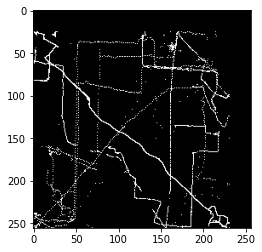

Complete 7...
Ploting 8th trajectories...


<Figure size 432x288 with 0 Axes>

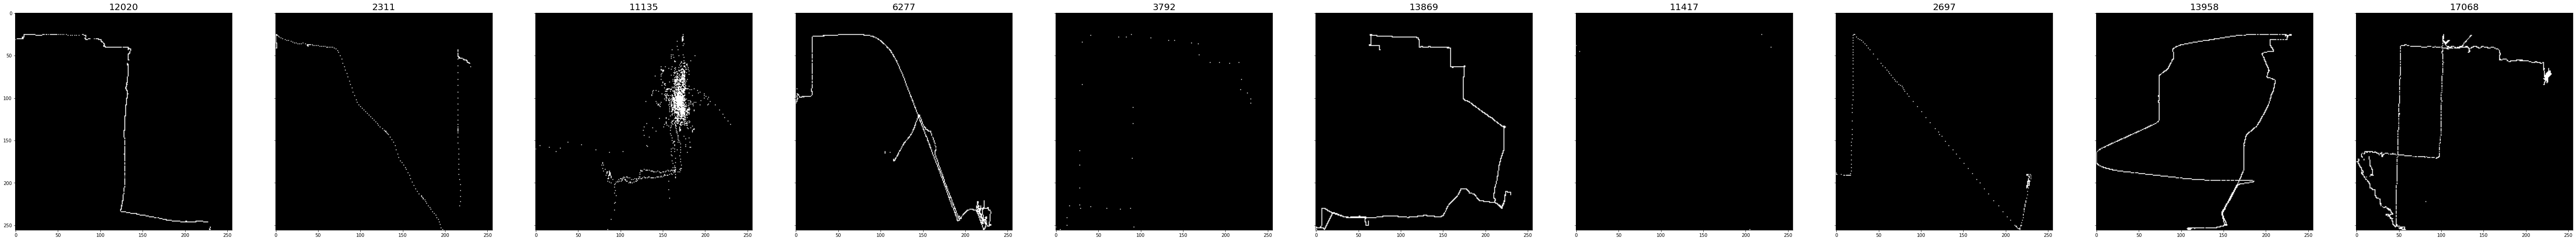

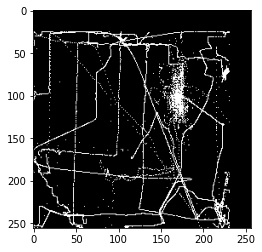

Complete 8...
Ploting 9th trajectories...


<Figure size 432x288 with 0 Axes>

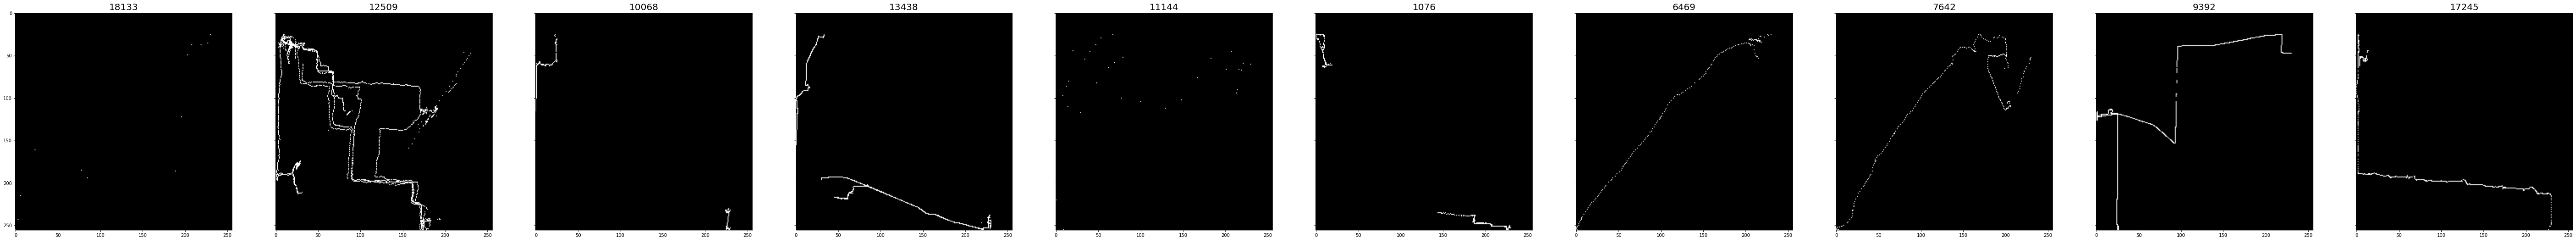

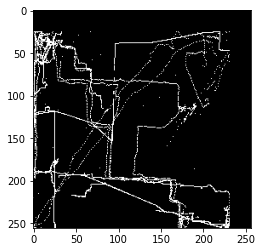

Complete 9...


In [ ]:
os.chdir(CURR_RESULT_DIR)
for i in range(1, 11):
    plot_random_trajectories(trajectory_images, f'{i if i > 9 else "0" + str(i)}th sum image.png')

In [ ]:
def sum_trajectories(trajectories, indexes):
    sum_images = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
    for idx in indexes:
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if (trajectories[idx][row][col] > 0):
                    sum_images[row][col] = 255
    
    return sum_images

In [ ]:
group1 = set([17333, 8009, 8561, 5894, 13593, 12020, 2311, 3792, 13869, 17068])
group2 = set([14586, 9973, 3725, 17410])
group3 = set([13948, 15894, 13593, 1433, 7550])

sum1 = sum_trajectories(trajectory_images, group1)
sum2 = sum_trajectories(trajectory_images, group2)
sum3 = sum_trajectories(trajectory_images, group3)

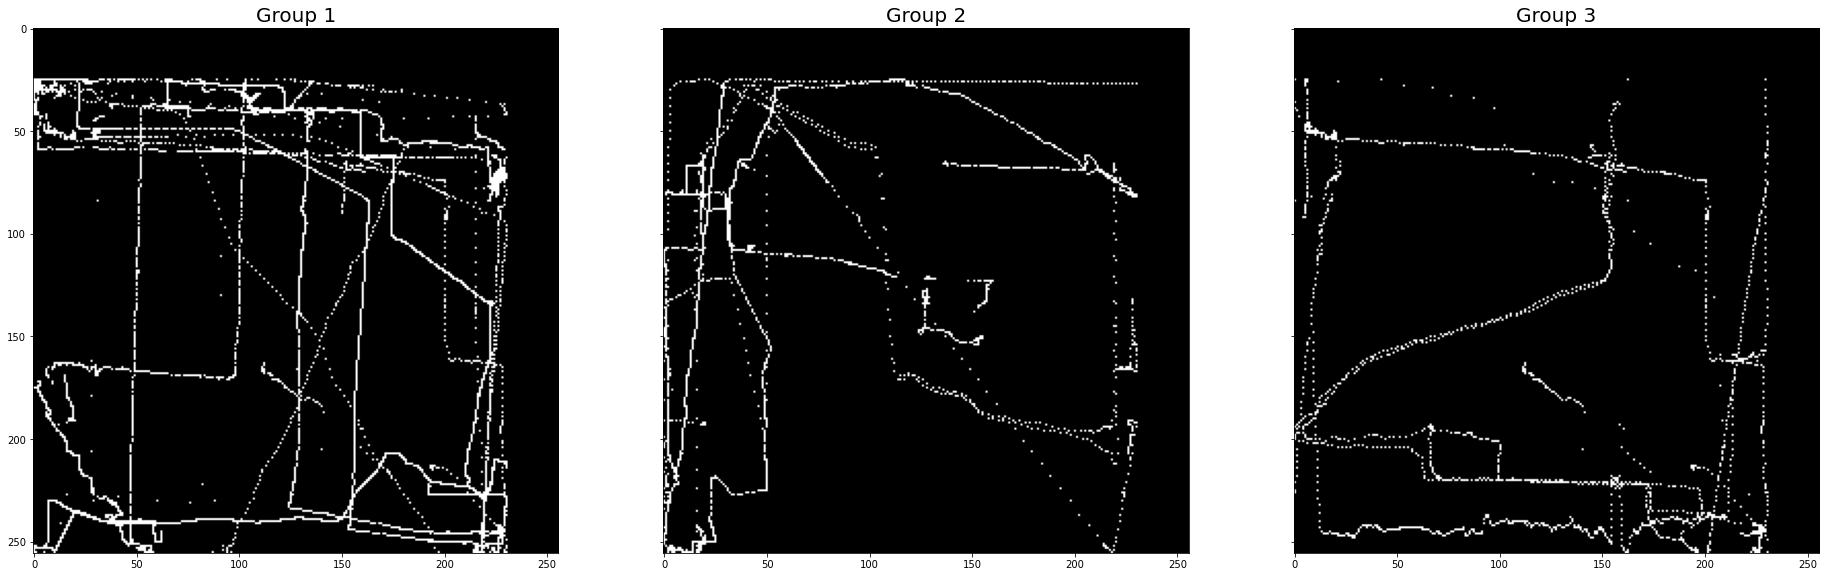

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (32, 96))
ax[0].imshow(sum1); ax[0].set_title('Group 1', fontsize = 20)
ax[1].imshow(sum2); ax[1].set_title('Group 2', fontsize = 20)
ax[2].imshow(sum3); ax[2].set_title('Group 3', fontsize = 20)

plt.show()
plt.savefig('Total selected trajectories.png', dpi = 300)

In [ ]:
group1_image_names = [file_names[i] for i in group1]
group2_image_names = [file_names[i] for i in group2]
group3_image_names = [file_names[i] for i in group3]

print(group1_image_names)

['Geolife_trajectory15302.png', 'Geolife_trajectory12078.png', 'Geolife_trajectory17206.png', 'Geolife_trajectory8557.png', 'Geolife_trajectory5678.png', 'Geolife_trajectory13410.png', 'Geolife_trajectory17703.png', 'Geolife_trajectory4012.png', 'Geolife_trajectory8796.png', 'Geolife_trajectory5429.png']


In [ ]:
temp = [group1_image_names, group2_image_names, group3_image_names]
for i in range(3):
    with open(f'Group{i}_file_name.txt', 'wt') as f:
        f.write(', '.join(temp[i]))